In [639]:
import gzip
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [640]:
# accepts the mnist image input in zipped format and return np array
def get_data(filename, data_size, type='img'):
    if type == 'img':
        F_SIZE = 16
    elif type == 'label':
        F_SIZE = 8
    with gzip.open(filename) as f:
        f.read(F_SIZE)
        data_buffer = f.read(data_size[0] * data_size[1] * data_size[2])
        if type == 'img':
            data = np.frombuffer(data_buffer, dtype=np.uint8).astype(np.float32)
            data = data.reshape(data_size[2], data_size[1], data_size[0])
        elif type == 'label':
            data = np.frombuffer(data_buffer, dtype=np.uint8).astype(np.float64)
            # print(data)
        return data


def step_function(value):
    if value >= 0:
        return 1
    else:
        return 0


def create_desired_output_vector(index):
    # print(index)
    zero_list = np.zeros(10)
    zero_list[index] = 1
    return zero_list.reshape(10, 1)




In [641]:
#Activation function to find sigmoid function
def get_sigmoid_out(alpha, v):
    return 1.0/(1.0 + exp(-alpha*v))

In [642]:
# train the neural network model for 60000 training images of size 28*28
train_data = get_data('/Users/kislaya/Documents/UIC/NN/train-images-idx3-ubyte.gz', [28, 28, 60000], 'img')
train_labels = get_data('/Users/kislaya/Documents/UIC/NN/train-labels-idx1-ubyte.gz', [1, 1, 60000], 'label')
epoch_number = 0
# n = 400
n = 60000
# n = 1000
param = 10
epoch_errors = dict()
epoch_test_errors = dict()


thresh = 0.085
epoch_errors[epoch_number] = 0
epoch_test_errors[epoch_number] = 0


# W1 = np.random.rand(785, 800)
# W2 = np.random.rand(801, 10)
val = list()
w_l1 = np.random.uniform(low=-1, high=1, size=(400,785))
w_l2 = np.random.uniform(low=-1, high=1, size=(401,10))
alpha = 0.001

In [643]:
test_data = get_data('/Users/kislaya/Documents/UIC/NN/t10k-images-idx3-ubyte.gz', [28, 28, 10000], 'img')
test_labels = get_data('/Users/kislaya/Documents/UIC/NN/t10k-labels-idx1-ubyte.gz', [1, 1, 10000], 'label')

In [644]:

def find_differen_induced_local_l1(alpha, v):
    return alpha*exp(-alpha*v)/((1+exp(-alpha*v))**2)

In [645]:
print(train_data.shape)
print(train_labels.shape)
N=400
alpha = 0.01
eta = 1
    

(60000, 28, 28)
(60000,)


In [646]:
def step_function(value):
    if value >= 0:
        return 1
    else:
        return 0



In [647]:
# n = int(n/10)

In [648]:
energy_list = []
y=[]
while True:
    epoch_errors[epoch_number] = 0
    epoch_test_errors[epoch_number] = 0
    print("EPOCH")
    print(epoch_errors)
    n_errors = 0
    
    energy = 0
    for i in range(n):
#         print(i)
        x = train_data[i].reshape(784, 1)
        des = create_desired_output_vector(int(train_labels[i])) 

        w_l2=w_l2.reshape(N+1,10)
        v1 = np.matmul(w_l1, np.append(1,x))
        temp = np.vectorize(get_sigmoid_out)
        y1 = temp(alpha, v1)
        v2=np.matmul(w_l2.T, np.append(1,y1.T).reshape(N+1,1))
        y2 = temp(alpha, v2)
        
        my_out = np.argmax(y2)
        y.append(my_out)
        if int(train_labels[i])!=my_out:
            epoch_errors[epoch_number]+=1
        diff_v = np.vectorize(find_differen_induced_local_l1)
        diff_v1= diff_v(alpha, v1)
        diff_v2 = diff_v(alpha, v2)


        delta2 = np.multiply((des-y2), diff_v2)

        diff_v1 = diff_v1.reshape(N,1)

        delta1 = np.multiply(np.matmul(w_l2, delta2)[1:], diff_v1)

        biased_y1 = np.append(1,y1).reshape(N+1,1).T

        biased_y0 = np.append(1,x).reshape(1, 785)



        g2 = np.matmul(-delta2, biased_y1)

        g1 = np.matmul(-delta1,biased_y0 )
        w_l1 = w_l1-eta*g1
        w_l2 = w_l2-eta*g2.T
#         print(g2.shape)
        
#         print(np.linalg.norm((des-y2))**2)
        energy+= np.linalg.norm((des-y2))**2
    
    energy = energy/n
    print("*********************************")
    print(energy)
    energy_list.append(energy)
#     if len(energy_list)>1:
#         print(energy_list[-2]-energy_list[-1])
#         if energy_list[-1]<0.1:
#             print("*********")
#             break
        
    errors = 0
    
    for i in range(10000):
        x_test = test_data[i].reshape(784, 1)
        des_test = create_desired_output_vector(int(test_labels[i])) 
        w_l2=w_l2.reshape(N+1,10)
        v1_test = np.matmul(w_l1, np.append(1,x_test))
        temp = np.vectorize(get_sigmoid_out)
        y1_test = temp(alpha, v1_test)
        v2_test=np.matmul(w_l2.T, np.append(1,y1_test.T).reshape(N+1,1))
        y2_test = temp(alpha, v2_test)
        my_out = np.argmax(y2_test)
        if int(test_labels[i])!=my_out:
            epoch_test_errors[epoch_number]+=1
            errors+=1
    epoch_number+=1        
    print("TEST ERRORS")
    print(errors)
    if errors<499:
        break
    

EPOCH
{0: 0}
*********************************
0.7169182481343253
TEST ERRORS
1850
EPOCH
{0: 23944, 1: 0}
*********************************
0.35439021960636935
TEST ERRORS
988
EPOCH
{0: 23944, 1: 7779, 2: 0}
*********************************
0.22800680002016044
TEST ERRORS
852
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 0}
*********************************
0.18042254788910964
TEST ERRORS
775
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 4869, 4: 0}
*********************************
0.1557645479840524
TEST ERRORS
728
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 4869, 4: 4440, 5: 0}
*********************************
0.1399786512270984
TEST ERRORS
690
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 4869, 4: 4440, 5: 4072, 6: 0}
*********************************
0.12869034520669356
TEST ERRORS
649
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 4869, 4: 4440, 5: 4072, 6: 3800, 7: 0}
*********************************
0.11996241335953715
TEST ERRORS
618
EPOCH
{0: 23944, 1: 7779, 2: 5588, 3: 4869, 4: 4440, 5: 4072, 6: 3800, 7: 3571,

In [629]:
# epoch_test_errors

{0: 8982, 1: 8982, 2: 0}

In [ ]:
# errors = 0

# for i in range(10000):
#     x_test = test_data[i].reshape(784, 1)
#     des_test = create_desired_output_vector(int(test_labels[i])) 
#     w_l2=w_l2.reshape(N+1,10)
#     v1_test = np.matmul(w_l1, np.append(1,x_test))
#     temp = np.vectorize(get_sigmoid_out)
#     y1_test = temp(alpha, v1_test)
#     v2_test=np.matmul(w_l2.T, np.append(1,y1_test.T).reshape(N+1,1))
#     y2_test = temp(alpha, v2_test)
#     my_out = np.argmax(y2_test)
#     if int(test_labels[i])!=my_out:
#         errors+=1
# print("TEST ERRORS")
# print(errors)

Text(0,0.5,'Training Errors')

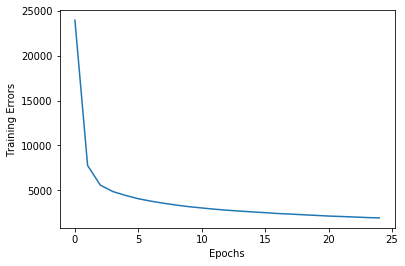

In [649]:
plt.plot(list(epoch_errors.keys()), epoch_errors.values())
plt.xlabel('Epochs')
plt.ylabel('Training Errors')

Text(0,0.5,'Test Errors')

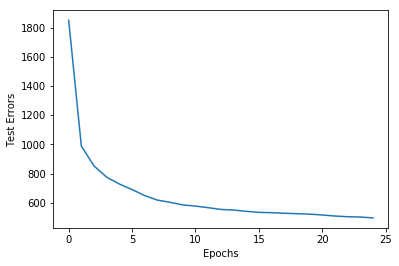

In [650]:
plt.plot(list(epoch_test_errors.keys()), epoch_test_errors.values())
plt.xlabel('Epochs')
plt.ylabel('Test Errors')

Text(0,0.5,'Energy')

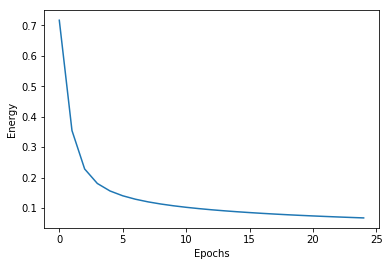

In [660]:
plt.plot(list(range(len(energy_list))), energy_list)
plt.xlabel('Epochs')
plt.ylabel('Energy')

In [14]:
w_l2[0]

array([ 0.1621393 ,  0.05893478, -0.12507725,  0.26358603, -0.04645267,
       -0.23113507, -0.09586662, -0.37516085,  0.16322229, -0.05165041])

In [38]:
k=0
# print(np.multiply(des-y2, w_l2[k+1]))
# print((y1[k]*(1-y1[k]))*np.multiply(des-y2, w_l2[k+1])*diff_v1[k])

In [ ]:
grad_l1 = np.empty((800, 785))
for k in range(800):
    common = (y1[k]*(1-y1[k]))*np.multiply(des-y2, w_l2[k+1])*diff_v1[k]
    grad_l1[k][0] = np.array([[(y1[k]*(1-y1[k]))*np.multiply(des-y2, w_l2[k+1])*diff_v1[k]]])
    for l in range(1,785):
        grad_l1[k][l]= 

In [99]:
y1.shape

(800,)

In [ ]:

#print(y1.shape)

# y2=np.matmul(w_l2.T, np.append(1,y1.T).reshape(25,1))
#print(y2.shape)
# y2 = y2[0][0]
# y.append(y2)

#         grad_l1 = np.array([])
#         grad_l2 = np.array([-(d[i]-y2)])
grad_l1 = np.array([[-(d[i]-y2)*1*w_l2[1][0]*diff_v1[0][0], -x[i]*(d[i]-y2)*1*w_l2[1][0]*diff_v1[0][0]]])
grad_l2 = np.array([-(d[i]-y2), -y1[0]*(d[0]-y2)])
for j in range(1,24):
    temp = np.array([[-(d[i]-y2)*1*w_l2[j+1][0]*diff_v1[j][0], -x[i]*(d[i]-y2)*1*w_l2[j+1][0]*diff_v1[j][0]]])
    grad_l1 = np.concatenate((grad_l1, temp))
    grad_l2 = np.append(grad_l2, -y1[j]*(d[i]-y2))
grad_l2 = grad_l2.reshape(25,1)
#     print(w_l2.shape)
#         print(grad_l1)
w_l1 = w_l1-eta*grad_l1
w_l2 = w_l2-eta*grad_l2

